<a href="https://www.kaggle.com/code/jescaochieng/exploratory-data-analysis-for-supermarket-sales?scriptVersionId=157175460" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


About Dataset
Context
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information
Invoice id: Computer generated sales slip invoice identification number
Branch: Branch of supercenter (3 branches are available identified by A, B and C).
City: Location of supercenters
Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
Gender: Gender type of customer
Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
Unit price: Price of each product in $
Quantity: Number of products purchased by customer
Tax: 5% tax fee for customer buying
Total: Total price including tax
Date: Date of purchase (Record available from January 2019 to March 2019)
Time: Purchase time (10am to 9pm)
Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
COGS: Cost of goods sold
Gross margin percentage: Gross margin percentage
Gross income: Gross income


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv',parse_dates=['Date'])

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

**Display top 5 rows of the data set**

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**display 5 last rows from our dataset**

In [7]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


**Print 5 random rows from our dataset**

In [8]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
216,560-30-5617,B,Mandalay,Normal,Female,Sports and travel,24.77,5,6.1925,130.0425,2019-03-24,18:27,Cash,123.85,4.761905,6.1925,8.5
341,433-75-6987,B,Mandalay,Member,Female,Health and beauty,55.97,7,19.5895,411.3795,2019-03-05,19:06,Ewallet,391.79,4.761905,19.5895,8.9
46,370-41-7321,B,Mandalay,Member,Male,Health and beauty,56.69,9,25.5105,535.7205,2019-02-27,17:24,Credit card,510.21,4.761905,25.5105,8.4
236,211-30-9270,C,Naypyitaw,Normal,Male,Health and beauty,17.41,5,4.3525,91.4025,2019-01-28,15:16,Credit card,87.05,4.761905,4.3525,4.9
840,497-36-0989,A,Yangon,Normal,Male,Fashion accessories,51.94,3,7.7910,163.6110,2019-02-15,15:21,Cash,155.82,4.761905,7.7910,7.9


**Find shape of our dataset (number of rows and columns)**

In [9]:
df.shape

(1000, 17)

In [10]:
print('number of columns', df.shape[0])
print('number of rows', df.shape[1])


number of columns 1000
number of rows 17


**Check for null values in data set**

In [11]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**get information about our dataset like; total number of rows, total number of columns,data type of each column and memory requirements**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

**Get overall statistics of our data**

In [13]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


**Univariate analysis**
1. find aggregate sales among branches (categorical)

In [14]:
#cat=[]
#num=[]
#for column in data.columns:
   # if data[column].nunique()>10:
      #  num.append(column)
   # else:
       # cat.append(column)

Text(0.5, 1.0, 'Branch count')

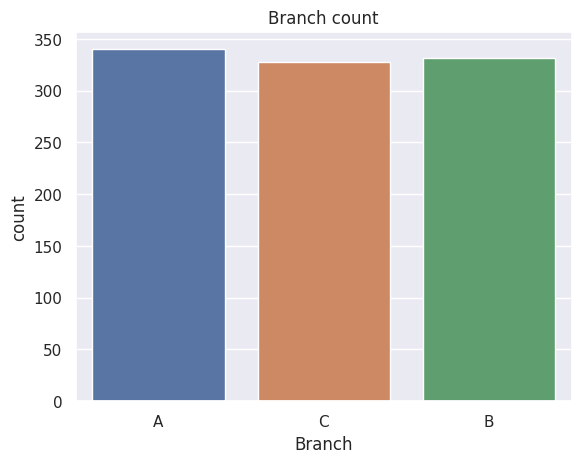

In [15]:
sns.set(style='darkgrid',)
sns.countplot(x='Branch', data=df).set_title('Branch count')


<Axes: xlabel='Branch'>

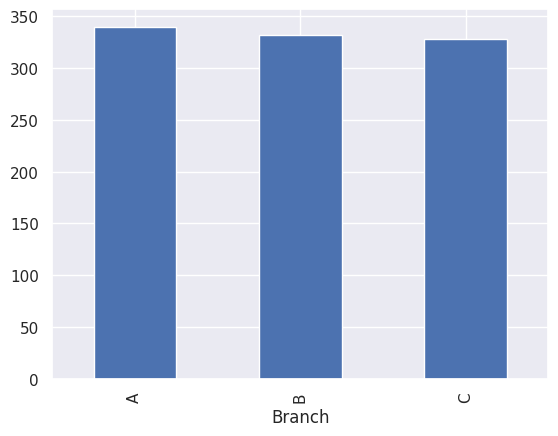

In [16]:
df['Branch'].value_counts().plot(kind='bar')

**Find the most popular method used by customers** categorical

<Axes: xlabel='Payment'>

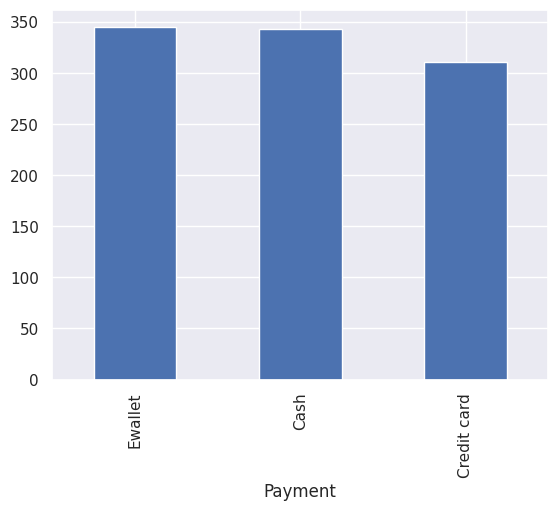

In [17]:
df['Payment'].value_counts().plot(kind='bar')


**Find distribution of customer rating**

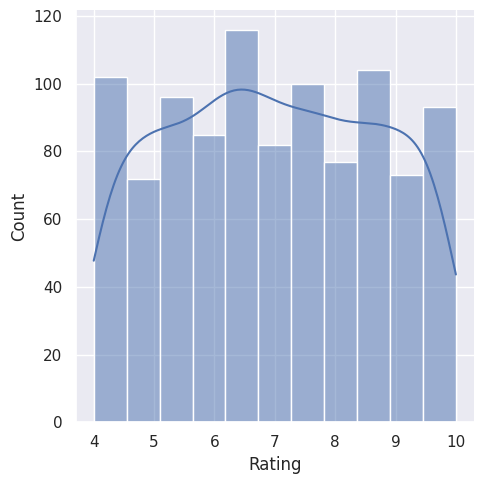

In [18]:
sns.displot(df['Rating'],kde=True)

In [19]:
df['Rating'].skew()

0.00900964876573073

**Find distribution of cost of goods sold**

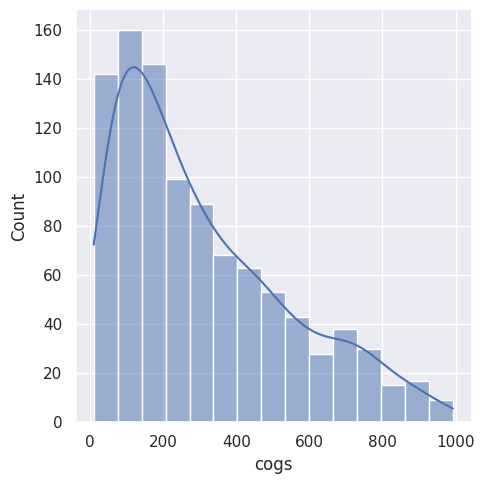

In [20]:
sns.displot(df['cogs'], kde=True)

In [21]:
df['cogs'].skew()

0.8925698049581418

<Axes: >

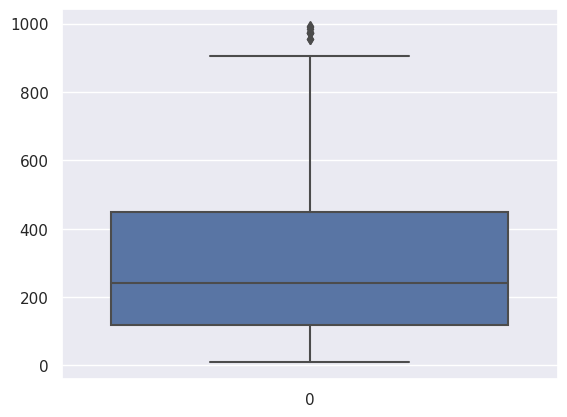

In [22]:
sns.boxplot(df['cogs'])

**Does the cost of goods affect the ratings that the customers provide**

<Axes: xlabel='cogs', ylabel='Rating'>

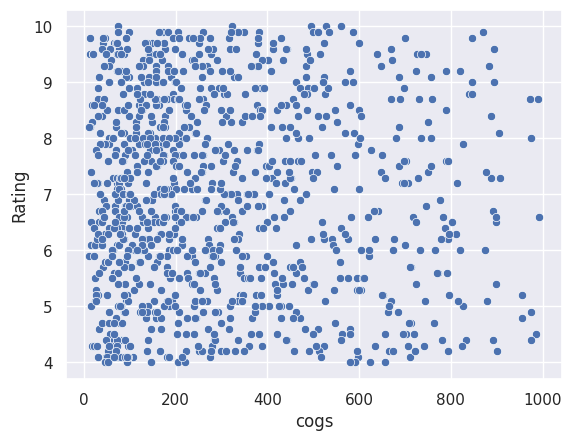

In [23]:
sns.set(style='darkgrid')
sns.scatterplot(data=df,x='cogs',y='Rating')

**Find the most profitable branch as per gross income**

<Axes: xlabel='Branch', ylabel='gross income'>

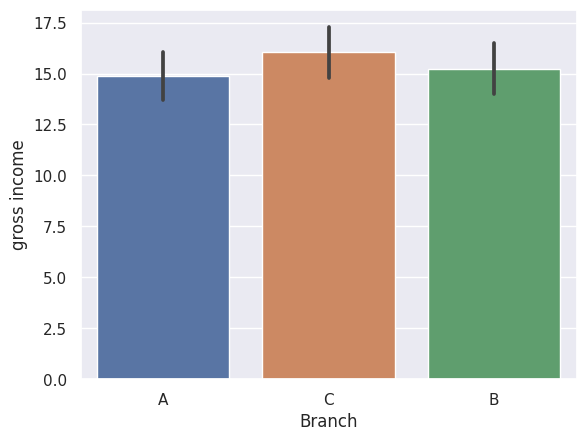

In [24]:
sns.barplot(data=df, x='Branch', y='gross income')

<Axes: xlabel='Branch', ylabel='gross income'>

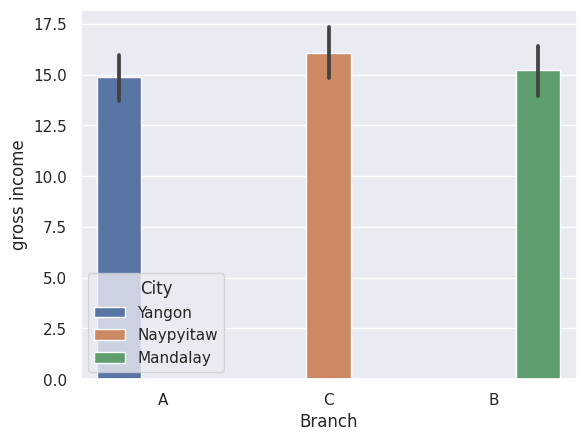

In [25]:
sns.barplot(data=df, x='Branch', y='gross income', hue='City')

**Is there any relationship between  gender gross income**

<Axes: xlabel='Gender', ylabel='gross income'>

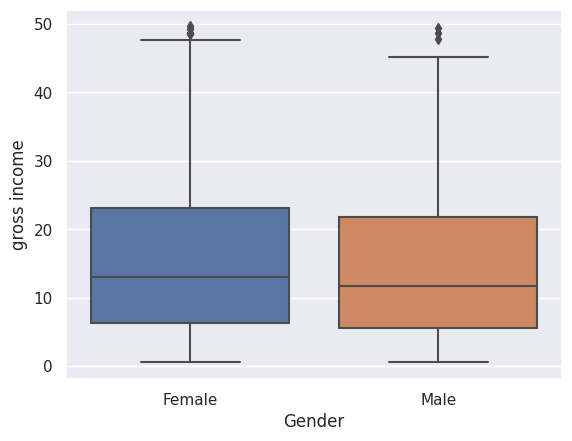

In [26]:
sns.boxplot(data=df, x='Gender', y='gross income')

<Axes: xlabel='Gender', ylabel='gross income'>

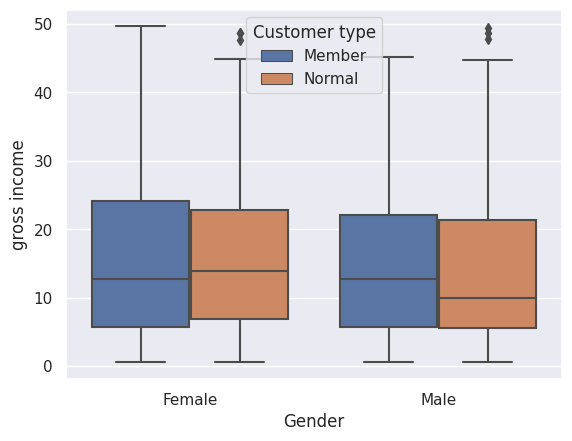

In [27]:
sns.boxplot(data=df, x='Gender', y='gross income', hue='Customer type')

**Find the productline that generates most income**

In [28]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

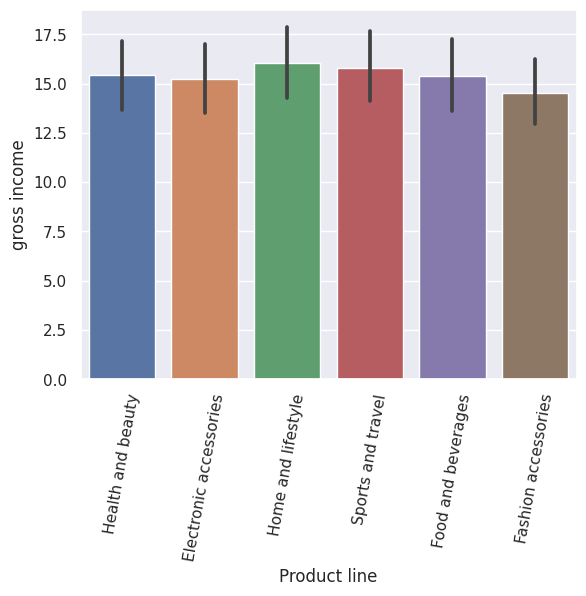

In [29]:
sns.barplot(data=df, x='Product line', y='gross income')
plt.xticks(rotation=80)
plt.show()

**Find the highest unit price for product line**

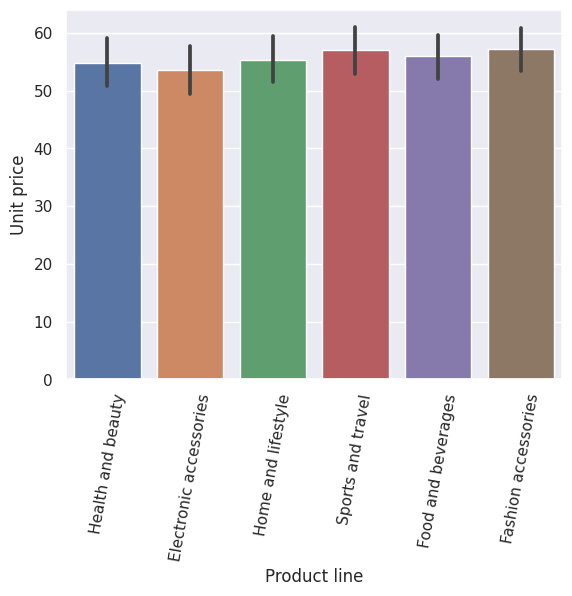

In [30]:
sns.barplot(data=df, x='Product line', y='Unit price')
plt.xticks(rotation=80)
plt.show()

**Find different payment method used city wise**

In [31]:
pd.crosstab(df['City'],df['Payment'])#categorical vs categorical relationship

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


<Axes: xlabel='Payment', ylabel='City'>

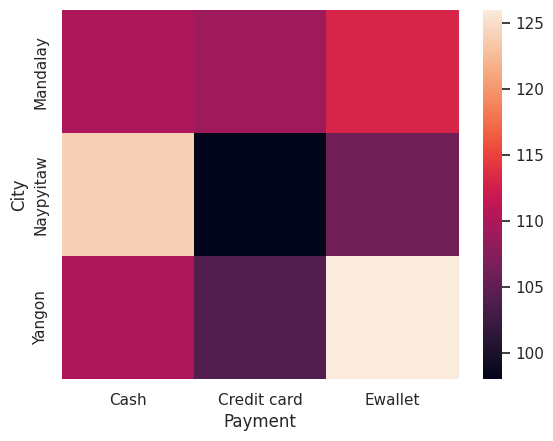

In [32]:
sns.heatmap(pd.crosstab(df['City'],df['Payment']))

**Which productline is purchased in the highest quantity**

<Axes: xlabel='Product line'>

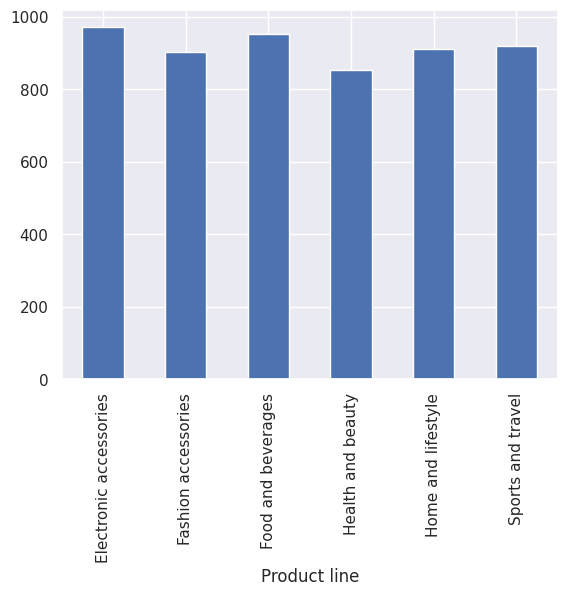

In [33]:
df.groupby('Product line').Quantity.sum().plot(kind='bar')

**Display daily sales by days of the week**

In [34]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [35]:
dw_mapping = {0:'Monday',
             1:'Tuesday',
             2:'Wednesday',
             3:'Thursday',
             4:'Friday',
             5:'Saturday',
             6:'Sunday'}

In [36]:
df['Date'].dt.dayofweek.map(dw_mapping)

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Date, Length: 1000, dtype: object

In [37]:
df['day_of_week'] = df['Date'].dt.dayofweek.map(dw_mapping)

<Axes: xlabel='day_of_week'>

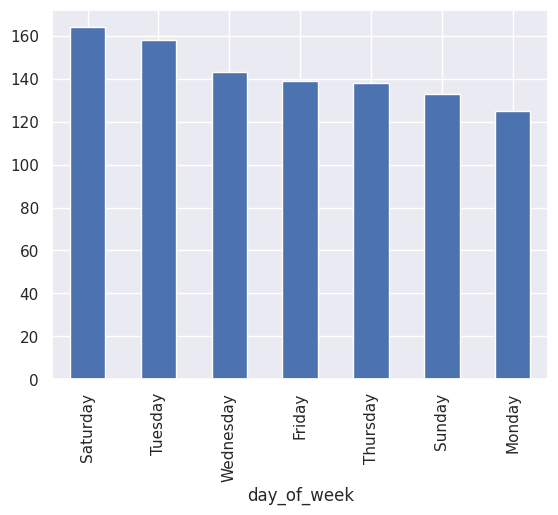

In [38]:
df['day_of_week'].value_counts().plot(kind='bar')

What will be the highest months of sale

In [39]:
month_mapping = {1:'January',
                 2:'February',
                 3:'March'}

In [40]:
df['Months'] = df['Date'].dt.month.map(month_mapping)

<Axes: xlabel='Months'>

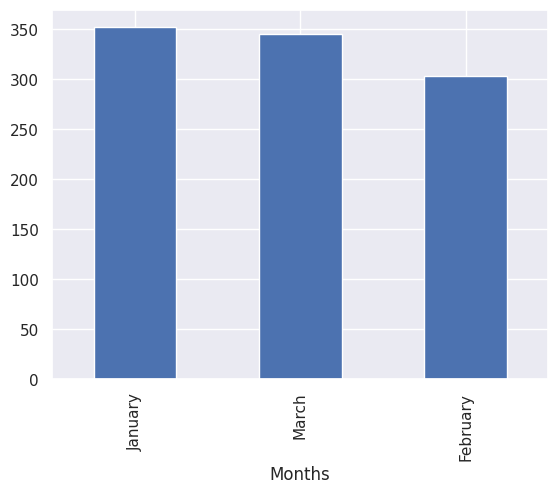

In [41]:
df['Months'].value_counts().plot(kind='bar')